In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Split Train and Test Data----------
from sklearn.model_selection import train_test_split

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/AfterDataCleaning.csv')

In [3]:
df.head()

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [4]:
X = df.drop('churn',axis=1)
Y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

print(f'Shape of X_train is- {X_train.shape}')
print(f'Shape of X_test is- {X_test.shape}')
print(f'Shape of y_train is- {y_train.shape}')
print(f'Shape of y_test is- {y_test.shape}')

Shape of X_train is- (1375, 14)
Shape of X_test is- (590, 14)
Shape of y_train is- (1375,)
Shape of y_test is- (590,)


In [5]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_training_data)
    pred_test = model.predict(X_test_data)
    
    train_acc = accuracy_score(Y_training_data, pred_train)
    test_acc = accuracy_score(Y_test_data, pred_test)
    
    train_recall = recall_score(Y_training_data,pred_train)
    test_recall = recall_score(Y_test_data,pred_test)
    
    train_precision = precision_score(Y_training_data,pred_train)
    test_precision = precision_score(Y_test_data,pred_test)
    
    train_f1 = f1_score(Y_training_data,pred_train)
    test_f1 = f1_score(Y_test_data,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(Y_training_data,pred_train))
        print("Accuracy on test set : ",accuracy_score(Y_test_data,pred_test))
        print("Recall on training set : ",recall_score(Y_training_data,pred_train))
        print("Recall on test set : ",recall_score(Y_test_data,pred_test))
        print("Precision on training set : ",precision_score(Y_training_data,pred_train))
        print("Precision on test set : ",precision_score(Y_test_data,pred_test))
        print("F1-Score on training set : ",f1_score(Y_training_data,pred_train))
        print("F1-Score on test set : ",f1_score(Y_test_data,pred_test))
    
    return score_list # returning the list with train and test scores

In [6]:
def get_summary_of_models(models):
    # defining list of models

    # defining empty lists to add train and test results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train =[]
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_metrics_score(model,X_train, X_test, y_train, y_test,False)
            acc_train.append(np.round(j[0],2))
            acc_test.append(np.round(j[1],2))
            recall_train.append(np.round(j[2],2))
            recall_test.append(np.round(j[3],2))
            precision_train.append(np.round(j[4],2))
            precision_test.append(np.round(j[5],2))
            f1_train.append(np.round(j[6],2))
            f1_test.append(np.round(j[7],2))
    
    model_metrics = pd.DataFrame({'TrainAccuracy': acc_train, 'TestAccuracy': acc_test, 'Train_Recall':recall_train, 
                                  'TestRecall':recall_test, 'TrainPrecision':precision_train, 'TestPrecision':precision_test, 
                                  'TrainF1Score':f1_train, 'TestF1Score':f1_test
                                 })
    
    return model_metrics

In [7]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_ROC_AUC_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train_prob = model.predict_proba(X_training_data)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = roc_auc_score(Y_training_data, pred_train_prob)
    pred_test_prob = model.predict_proba(X_test_data)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = roc_auc_score(Y_test_data,pred_test_prob)

    score_list.extend((train_auc,test_auc))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:    
        print("ROC AUC Score on training set : ",roc_auc_score(Y_training_data,pred_train_prob))
        print("ROC AUC Score on test set : ",roc_auc_score(Y_test_data,pred_test_prob))
        
    return score_list

In [8]:
def get_ROC_AUC_score_of_models(models):
    # defining list of models

    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_ROC_AUC_score(model,X_train, X_test, y_train, y_test,False)
            roc_auc_train.append(np.round(j[0],2))
            roc_auc_test.append(np.round(j[1],2))
    
    model_auc_score = pd.DataFrame({'Train ROC-AUC Score': roc_auc_train, 'Test ROC-AUC Score': roc_auc_test})
    
    return model_auc_score

## 1. Logistic Regression

In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_lr_train_predicted = lr_model.predict(X_train)
y_lr_test_predicted = lr_model.predict(X_test)
metrics.accuracy_score(y_train,y_lr_train_predicted)
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.872
Accuracy on test set :  0.8542372881355932
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1-Score on training set :  0.0
F1-Score on test set :  0.0


In [10]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lr_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lr_test_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train, y_lr_train_predicted))
print('\nConfusion matrix for the test Data- \n',confusion_matrix(y_test, y_lr_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1199
           1       0.00      0.00      0.00       176

    accuracy                           0.87      1375
   macro avg       0.44      0.50      0.47      1375
weighted avg       0.76      0.87      0.81      1375


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       504
           1       0.00      0.00      0.00        86

    accuracy                           0.85       590
   macro avg       0.43      0.50      0.46       590
weighted avg       0.73      0.85      0.79       590

Confusion matrix for the train Data- 
 [[1199    0]
 [ 176    0]]

Confusion matrix for the test Data- 
 [[504   0]
 [ 86   0]]


## 2. Linear Discriminant Analysis

In [11]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train,y_train)
y_lda_train_predicted = lda_model.predict(X_train)
y_lda_test_predicted = lda_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.866909090909091
Accuracy on test set :  0.8593220338983051
Recall on training set :  0.23295454545454544
Recall on test set :  0.23255813953488372
Precision on training set :  0.4606741573033708
Precision on test set :  0.5405405405405406
F1-Score on training set :  0.30943396226415093
F1-Score on test set :  0.3252032520325203


In [12]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_lda_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1199
           1       0.46      0.23      0.31       176

    accuracy                           0.87      1375
   macro avg       0.68      0.60      0.62      1375
weighted avg       0.84      0.87      0.85      1375


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       504
           1       0.54      0.23      0.33        86

    accuracy                           0.86       590
   macro avg       0.71      0.60      0.62       590
weighted avg       0.83      0.86      0.83       590

Confusion matrix for the train data- 
 [[1151   48]
 [ 135   41]]

Confusion matrix for the test data- 
 [[487  17]
 [ 66  20]]


## 3 Gaussian Naive Bayes

In [13]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train)
# make predictions for test data
y_gnb_test_predicted = GNB_model.predict(X_test)
#Using above defined function to get accuracy, recall and precision on train and test set
gnb_score=get_metrics_score(GNB_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.8749090909090909
Accuracy on test set :  0.8627118644067797
Recall on training set :  0.08522727272727272
Recall on test set :  0.09302325581395349
Precision on training set :  0.5769230769230769
Precision on test set :  0.7272727272727273
F1-Score on training set :  0.1485148514851485
F1-Score on test set :  0.16494845360824745


In [14]:
# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gnb_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gnb_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1199
           1       0.58      0.09      0.15       176

    accuracy                           0.87      1375
   macro avg       0.73      0.54      0.54      1375
weighted avg       0.84      0.87      0.83      1375


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       504
           1       0.73      0.09      0.16        86

    accuracy                           0.86       590
   macro avg       0.80      0.54      0.55       590
weighted avg       0.85      0.86      0.81       590

Confusion matrix for the train data- 
 [[1188   11]
 [ 161   15]]

Confusion matrix for the test data- 
 [[501   3]
 [ 78   8]]


## 4. Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_dt_train_predicted = dt_model.predict(X_train)
y_dt_test_predicted = dt_model.predict(X_test)
print('Decision Tree Score is ',dt_model.score(X_train, y_train))
dt_score=gnb_score=get_metrics_score(dt_model, X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_dt_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_dt_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_dt_test_predicted))

Decision Tree Score is  1.0
Accuracy on training set :  1.0
Accuracy on test set :  0.8796610169491526
Recall on training set :  1.0
Recall on test set :  0.5348837209302325
Precision on training set :  1.0
Precision on test set :  0.5974025974025974
F1-Score on training set :  1.0
F1-Score on test set :  0.5644171779141104
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1375
   macro avg       1.00      1.00      1.00      1375
weighted avg       1.00      1.00      1.00      1375

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       504
           1       0.60      0.53      0.56        86

    accuracy                           0.88       590
   macro avg       0.76      0.74      0.

## 5. GridSearch on Decision Tree Classifier

In [16]:
param_grid = {
        'max_depth' : [10,15,20,25,30], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini', 'entropy']
    
}

dt_tuned = DecisionTreeClassifier()

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [17]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train, y_train)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train)

y_gs_dt_test_predicted = gs_dt_tuned.predict(X_test)

dt_score=get_metrics_score(gs_dt_tuned,X_train, X_test, y_train, y_test)

Best Params are- {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 35}


Best Score is- 0.9192727272727271
Accuracy on training set :  0.9367272727272727
Accuracy on test set :  0.9084745762711864
Recall on training set :  0.6306818181818182
Recall on test set :  0.47674418604651164
Precision on training set :  0.8345864661654135
Precision on test set :  0.82
F1-Score on training set :  0.7184466019417476
F1-Score on test set :  0.6029411764705882


Text(0.5, 0, 'Decision Tree Feature Importance')

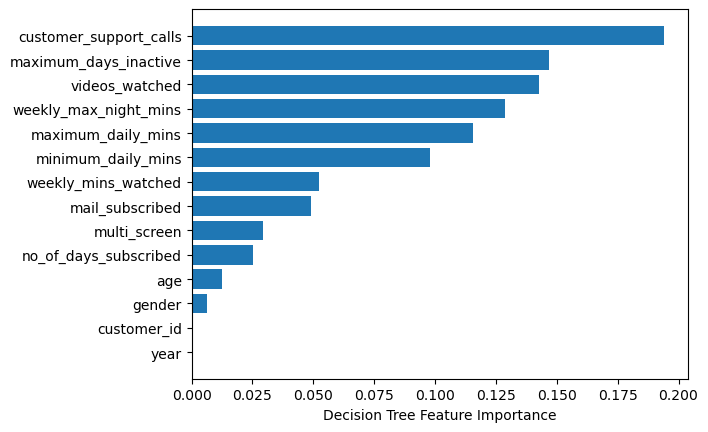

In [18]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

## 6. Random Forest Ensemble Technique

In [19]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                random_state=1)
RF_model.fit(X_train, y_train)

y_rf_train_predicted = RF_model.predict(X_train)
y_rf_test_predicted = RF_model.predict(X_test)
rf_score=get_metrics_score(RF_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('\n\nClassification report for the training data \n',classification_report(y_train, y_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_rf_test_predicted))

Accuracy on training set :  0.9301818181818182
Accuracy on test set :  0.9067796610169492
Recall on training set :  0.5340909090909091
Recall on test set :  0.3953488372093023
Precision on training set :  0.8703703703703703
Precision on test set :  0.918918918918919
F1-Score on training set :  0.6619718309859154
F1-Score on test set :  0.5528455284552846


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1199
           1       0.87      0.53      0.66       176

    accuracy                           0.93      1375
   macro avg       0.90      0.76      0.81      1375
weighted avg       0.93      0.93      0.92      1375

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       504
           1       0.92      0.40      0.55        86

    accuracy                           0.91       590
   macro

## 7. RandomForest Tuned

In [20]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18] # minimum sample number that can be stored in a leaf node
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [21]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train, y_train)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train)
y_gs_rf_test_predicted = gs_rf_tuned.predict(X_test)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_rf_test_predicted))

Best Params are- {'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 25}


Best Score is- 0.9214512911747264

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1199
           1       0.88      0.64      0.74       176

    accuracy                           0.94      1375
   macro avg       0.92      0.81      0.85      1375
weighted avg       0.94      0.94      0.94      1375

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       504
           1       0.89      0.49      0.63        86

    accuracy                           0.92       590
   macro avg       0.91      0.74      0.79       590
weighted avg       0.92      0.92      0.91       590

Confusion matrix for the train data- 
 [[1184   15]
 [  64  112]]

Confusion matrix for the test da

Text(0.5, 0, 'Random Forest Feature Importance')

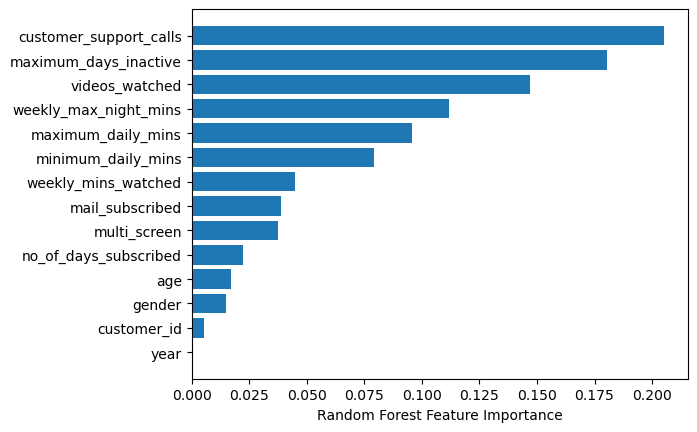

In [40]:
sorted_idx = gs_rf_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 8. Gradient Boosting

In [22]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(X_train)

# make predictions for test data
y_gbc_test_predicted = gbc_model.predict(X_test)
gbc_score=get_metrics_score(gbc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gbc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_gbc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_gbc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_gbc_test_predicted))

Accuracy on training set :  0.968
Accuracy on test set :  0.9135593220338983
Recall on training set :  0.7613636363636364
Recall on test set :  0.5116279069767442
Precision on training set :  0.9852941176470589
Precision on test set :  0.8301886792452831
F1-Score on training set :  0.8589743589743591
F1-Score on test set :  0.6330935251798562
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1199
           1       0.99      0.76      0.86       176

    accuracy                           0.97      1375
   macro avg       0.98      0.88      0.92      1375
weighted avg       0.97      0.97      0.97      1375

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       504
           1       0.83      0.51      0.63        86

    accuracy                           0.91       590
   macro avg       0.88     

## 9. Gradient Boosting Tuned

In [23]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [24]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_
gs_gbc_tuned.fit(X_train, y_train)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train)
y_gs_gbc_test_predicted = gs_gbc_tuned.predict(X_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_gbc_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gbc_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gbc_test_predicted))

Best Params are- {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 35, 'n_estimators': 30, 'subsample': 0.9}


Best Score is- 0.9352763586430853
Classification report for the training data 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1199
           1       0.92      0.68      0.78       176

    accuracy                           0.95      1375
   macro avg       0.93      0.83      0.87      1375
weighted avg       0.95      0.95      0.95      1375

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       504
           1       0.92      0.55      0.69        86

    accuracy                           0.93       590
   macro avg       0.92      0.77      0.82       590
weighted avg       0.93      0.93      0.92       590

Confusion matrix for the train data- 
 [[1188   11]
 [  57 

Text(0.5, 0, 'Gradient Boosting Feature Importance')

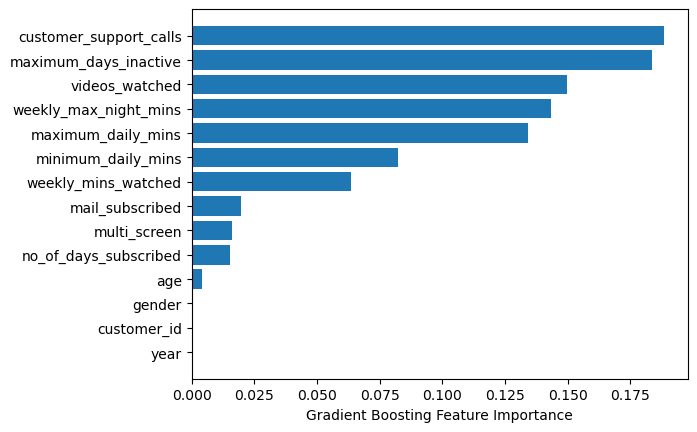

In [41]:
sorted_idx = gs_gbc_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_gbc_tuned.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 10. Bagging Classifier

In [25]:
bc_model = BaggingClassifier(random_state=1)
bc_model.fit(X_train,y_train)
# make predictions for train data
y_bc_train_predicted = bc_model.predict(X_train)

# make predictions for test data
y_bc_test_predicted = bc_model.predict(X_test)
bc_score=get_metrics_score(bc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_bc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_bc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_bc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_bc_test_predicted))

Accuracy on training set :  0.9854545454545455
Accuracy on test set :  0.9152542372881356
Recall on training set :  0.8863636363636364
Recall on test set :  0.4883720930232558
Precision on training set :  1.0
Precision on test set :  0.875
F1-Score on training set :  0.9397590361445783
F1-Score on test set :  0.6268656716417911
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1199
           1       1.00      0.89      0.94       176

    accuracy                           0.99      1375
   macro avg       0.99      0.94      0.97      1375
weighted avg       0.99      0.99      0.99      1375

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       504
           1       0.88      0.49      0.63        86

    accuracy                           0.92       590
   macro avg       0.90      0.74      0.79

## 11. Ada Boosting Classifier

In [26]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train,y_train)
# make predictions for train data
y_abc_train_predicted = abc_model.predict(X_train)

# make predictions for test data
y_abc_test_predicted = abc_model.predict(X_test)
abc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_abc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_abc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_abc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_abc_test_predicted))

Accuracy on training set :  0.8989090909090909
Accuracy on test set :  0.8610169491525423
Recall on training set :  0.3693181818181818
Recall on test set :  0.26744186046511625
Precision on training set :  0.6989247311827957
Precision on test set :  0.5476190476190477
F1-Score on training set :  0.48327137546468396
F1-Score on test set :  0.359375
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1199
           1       0.70      0.37      0.48       176

    accuracy                           0.90      1375
   macro avg       0.81      0.67      0.71      1375
weighted avg       0.89      0.90      0.89      1375

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       504
           1       0.55      0.27      0.36        86

    accuracy                           0.86       590
   macro avg       0.72

## 12 Voting Classifier

In [27]:
# defining list of models
estimator= [('LR',lr_model), ('LDA',lda_model), ('GNB',GNB_model), ('DT',dt_model), ('GSDT',gs_dt_tuned), ('RF',RF_model),
            ('GSRF',gs_rf_tuned), ('GBC',gbc_model), ('GSGBC',gs_gbc_tuned), ('BC', bc_model),('ABC',abc_model)]

In [28]:
soft_vc_model = VotingClassifier(estimators= estimator, voting='soft')
soft_vc_model.fit(X_train,y_train)

# make predictions for train data
y_soft_vc_train_predicted = soft_vc_model.predict(X_train)

# make predictions for test data
y_soft_vc_test_predicted = soft_vc_model.predict(X_test)
soft_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_soft_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_soft_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_soft_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_soft_vc_test_predicted))

Accuracy on training set :  0.8989090909090909
Accuracy on test set :  0.8610169491525423
Recall on training set :  0.3693181818181818
Recall on test set :  0.26744186046511625
Precision on training set :  0.6989247311827957
Precision on test set :  0.5476190476190477
F1-Score on training set :  0.48327137546468396
F1-Score on test set :  0.359375
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1199
           1       1.00      0.69      0.81       176

    accuracy                           0.96      1375
   macro avg       0.98      0.84      0.90      1375
weighted avg       0.96      0.96      0.96      1375

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       504
           1       0.93      0.44      0.60        86

    accuracy                           0.91       590
   macro avg       0.92

In [29]:
hard_vc_model = VotingClassifier(estimators= estimator, voting='hard')
hard_vc_model.fit(X_train,y_train)

# make predictions for train data
y_hard_vc_train_predicted = hard_vc_model.predict(X_train)

# make predictions for test data
y_hard_vc_test_predicted = hard_vc_model.predict(X_test)
hard_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_hard_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_hard_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_hard_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_hard_vc_test_predicted))

Accuracy on training set :  0.8989090909090909
Accuracy on test set :  0.8610169491525423
Recall on training set :  0.3693181818181818
Recall on test set :  0.26744186046511625
Precision on training set :  0.6989247311827957
Precision on test set :  0.5476190476190477
F1-Score on training set :  0.48327137546468396
F1-Score on test set :  0.359375
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1199
           1       1.00      0.65      0.79       176

    accuracy                           0.96      1375
   macro avg       0.98      0.83      0.88      1375
weighted avg       0.96      0.96      0.95      1375

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.95       504
           1       0.95      0.47      0.62        86

    accuracy                           0.92       590
   macro avg       0.93

<Figure size 1200x600 with 0 Axes>

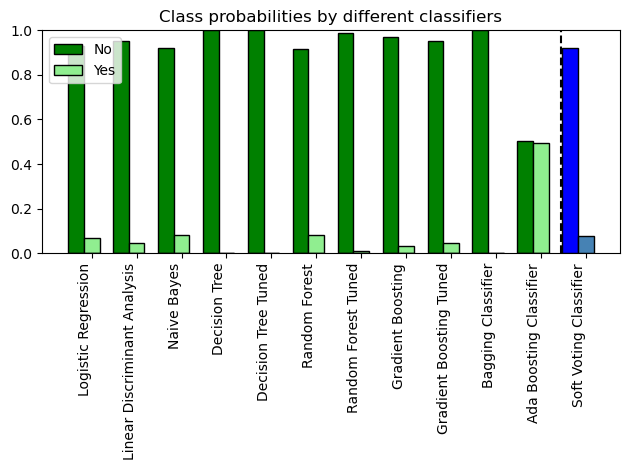

In [55]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model]

probability_list = [c.fit(X_train, y_train).predict_proba(X) for c in models_list]

class1_1 = [pr[0, 0] for pr in probability_list]
class2_1 = [pr[0, 1] for pr in probability_list]

# plotting

N = 12  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
fig, ax = plt.subplots()

# bars for classifier 1-11
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(10.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
     'Random Forest','Random Forest Tuned', 'Gradient Boosting','Gradient Boosting Tuned',
     'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier'],
    rotation=90,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities by different classifiers")
plt.legend([p1[0], p2[0]], ["No", "Yes"], loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model, hard_vc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier', 'Hard Voting Classifier']

all_model_comparison = get_summary_of_models(models_list)

all_model_comparison = all_model_comparison.set_index(pd.Index(index_list))

all_model_comparison

,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainPrecision,TestPrecision,TrainF1Score,TestF1Score
Logistic Regression,0.87,0.85,0.00,0.00,0.00,0.00,0.00,0.00
Linear Discriminant Analysis,0.87,0.86,0.23,0.23,0.46,0.54,0.31,0.33
Naive Bayes,0.87,0.86,0.09,0.09,0.58,0.73,0.15,0.16
Decision Tree,1.00,0.88,1.00,0.53,1.00,0.60,1.00,0.56
Decision Tree Tuned,0.94,0.91,0.63,0.48,0.83,0.82,0.72,0.60
Random Forest,0.93,0.91,0.53,0.40,0.87,0.92,0.66,0.55
Random Forest Tuned,0.94,0.92,0.64,0.49,0.88,0.89,0.74,0.63
Gradient Boosting Classifier,0.97,0.91,0.76,0.51,0.99,0.83,0.86,0.63
Gradient Boosting Classifier Tuned,0.95,0.93,0.68,0.55,0.92,0.92,0.78,0.69
Bagging Classifier,0.99,0.92,0.89,0.49,1.00,0.88,0.94,0.63


In [31]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier']

model_auc_score = get_ROC_AUC_score_of_models(models_list)

model_auc_score = model_auc_score.set_index(pd.Index(index_list))

model_auc_score

,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression,0.64,0.60
Linear Discriminant Analysis,0.81,0.79
Naive Bayes,0.68,0.63
Decision Tree,1.00,0.74
Decision Tree Tuned,0.96,0.81
Random Forest,0.94,0.89
Random Forest Tuned,0.97,0.87
Gradient Boosting Classifier,0.98,0.88
Gradient Boosting Classifier Tuned,0.92,0.88
Bagging Classifier,1.00,0.86
